In [1]:
# Import the necessary libraries
# 
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

In [2]:
# This function is used to extract the features and the labels from the dataset
# 
def extract_x_y(df, feature_name):
    y = df[feature_name]
    X = df.drop(columns=[feature_name])
    return X, y

In [3]:
# We encode only the required columns
# 
def encode_columns(X_train, X_test, columns, save=False):
    enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

    dfX_train = X_train[columns].copy()
    enc.fit(dfX_train)
    column_name = enc.get_feature_names(columns)

    X_train_1h = pd.DataFrame(enc.transform(dfX_train), columns=column_name)
    print(X_train_1h)
    print(X_train_1h.shape)

    dfX_test = X_test[columns].copy()
    X_test_1h = pd.DataFrame(enc.transform(dfX_test), columns=column_name)
    print(X_test_1h)
    print(X_test_1h.shape)

    return X_train_1h, X_test_1h

In [4]:
# We use this function to plot the metrics
#
def plot_metric(dict, name):
    plt.plot(dict[name])
    plt.plot(dict[f'val_{name}'])
    plt.title(f'model {name}')
    plt.ylabel(f'{name}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [5]:
# Define the Artificial Neural Nertwork topology
def define_nn_topology():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(number_of_features,)))

    # Only one hidden layer
    model.add(layers.Dense(units=64, activation='relu'))

    model.add(layers.Dense(units=number_of_classes, activation='softmax')) 
   
    # Compile neural network
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=[ 
                           tf.keras.metrics.CategoricalAccuracy(),
                           tf.keras.metrics.AUC(),
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()
                           ])
    return model

In [6]:
# Read the datas set
#
df = pd.read_csv('dataset.csv')
print(df)

    USER  TYPE  DIFF  CLASS
0  User1     4    90     95
1  User2     2    60     64
2  User3     3    30     36
3  User2     1    45     48
4  User4     5    30     39
5  User5     6    15     26
6  User1     5    60     66
7  User6     8    45     59
8  User1     4    90     95
9  User3     3    30     36


In [7]:
# Extract the features and the label
LABEL_COL = 'CLASS'
X, y = extract_x_y(df, LABEL_COL)

In [8]:
# Split the data set into traing and test
#
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, random_state=33, test_size=0.20)

In [9]:
# One-hot encoding of the categorical columns
#
one_hot_columns = ['USER', 'TYPE']
X_train_1h, X_test_1h = encode_columns(X_train, X_test, one_hot_columns)

   USER_User1  USER_User2  USER_User3  USER_User4  USER_User5  USER_User6  \
0         1.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         1.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         1.0         0.0         0.0         0.0   
3         0.0         1.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         1.0         0.0         0.0   
5         0.0         0.0         0.0         0.0         1.0         0.0   
6         1.0         0.0         0.0         0.0         0.0         0.0   
7         0.0         0.0         0.0         0.0         0.0         1.0   

   TYPE_1  TYPE_2  TYPE_3  TYPE_4  TYPE_5  TYPE_6  TYPE_8  
0     0.0     0.0     0.0     1.0     0.0     0.0     0.0  
1     0.0     1.0     0.0     0.0     0.0     0.0     0.0  
2     0.0     0.0     1.0     0.0     0.0     0.0     0.0  
3     1.0     0.0     0.0     0.0     0.0     0.0     0.0  
4     

In [10]:
# Transform the numerical column
#
col_4_transform = ['DIFF']

scaler = preprocessing.MaxAbsScaler()
X_train_transform = scaler.fit_transform(X_train[col_4_transform])
X_test_transform = scaler.transform(X_test[col_4_transform])

In [11]:
# Concatenate the data to form the train and test sets
#
X_train = pd.concat([X_train_1h, pd.DataFrame(data=X_train_transform, columns=col_4_transform)], axis=1)
X_test = pd.concat([X_test_1h, pd.DataFrame(data=X_test_transform, columns=col_4_transform)], axis=1)
print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)

   USER_User1  USER_User2  USER_User3  USER_User4  USER_User5  USER_User6  \
0         1.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         1.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         1.0         0.0         0.0         0.0   
3         0.0         1.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         1.0         0.0         0.0   
5         0.0         0.0         0.0         0.0         1.0         0.0   
6         1.0         0.0         0.0         0.0         0.0         0.0   
7         0.0         0.0         0.0         0.0         0.0         1.0   

   TYPE_1  TYPE_2  TYPE_3  TYPE_4  TYPE_5  TYPE_6  TYPE_8      DIFF  
0     0.0     0.0     0.0     1.0     0.0     0.0     0.0  1.000000  
1     0.0     1.0     0.0     0.0     0.0     0.0     0.0  0.666667  
2     0.0     0.0     1.0     0.0     0.0     0.0     0.0  0.333333  
3     1.0     0.0     0.0 

In [12]:
# Transform the labels into Pandas datasets
#
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [13]:
# encode the labels
# 
one_hot_columns_y = ['CLASS']
y_train, y_test = encode_columns(y_train, y_test, one_hot_columns_y)

   CLASS_26  CLASS_36  CLASS_39  CLASS_48  CLASS_59  CLASS_64  CLASS_66  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       1.0       0.0   
2       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
4       0.0       0.0       1.0       0.0       0.0       0.0       0.0   
5       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
6       0.0       0.0       0.0       0.0       0.0       0.0       1.0   
7       0.0       0.0       0.0       0.0       1.0       0.0       0.0   

   CLASS_95  
0       1.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  
6       0.0  
7       0.0  
(8, 8)
   CLASS_26  CLASS_36  CLASS_39  CLASS_48  CLASS_59  CLASS_64  CLASS_66  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       1.0       0.0       0.0

In [14]:
# Extract the number of samples, features and classes
number_of_samples = X_train.shape[0]
number_of_features = X_train.shape[1]
number_of_classes = y_train.shape[1]

print(f'\nsamples={number_of_samples} features={number_of_features} classes={number_of_classes}\n')


samples=8 features=14 classes=8



In [15]:
# Define the NN topology
#
model = define_nn_topology()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 14)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 520       
Total params: 1,480
Trainable params: 1,480
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Train the model 
#
batch_size = 1
epochs = 100

# https://www.tensorflow.org/guide/keras/train_and_evaluate
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 13s 107ms/step - loss: 2.0613 - categorical_accuracy: 0.1147 - auc: 0.5878 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.0374 - val_categorical_accuracy: 0.1056 - val_auc: 0.5302 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 2.2523 - categorical_accuracy: 0.0804 - auc: 0.4859 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9791 - val_categorical_accuracy: 0.1026 - val_auc: 0.5668 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 2.0024 - categorical_accuracy: 0.0961 - auc: 0.5780 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9337 - val_categorical_accuracy: 0.1017 - val_auc: 0.5983 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 2.0555 - categorical_accuracy: 0.0957 - auc:

Epoch 29/100
8/8 [==============================] - 0s 12ms/step - loss: 0.9305 - categorical_accuracy: 0.6890 - auc: 0.9238 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7875 - val_categorical_accuracy: 0.6960 - val_auc: 0.9263 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 30/100
8/8 [==============================] - 0s 12ms/step - loss: 0.8498 - categorical_accuracy: 0.6996 - auc: 0.9276 - precision: 0.0278 - recall: 9.3214e-05 - val_loss: 0.7401 - val_categorical_accuracy: 0.7062 - val_auc: 0.9300 - val_precision: 1.0000 - val_recall: 0.0033
Epoch 31/100
8/8 [==============================] - 0s 12ms/step - loss: 0.8065 - categorical_accuracy: 0.7095 - auc: 0.9312 - precision: 1.0000 - recall: 0.0042 - val_loss: 0.7019 - val_categorical_accuracy: 0.7157 - val_auc: 0.9335 - val_precision: 1.0000 - val_recall: 0.0129
Epoch 32/100
8/8 [==============================] - 0s 12ms/step - loss: 0.8405 - categorical_accuracy: 0.7188 - auc: 0.9345 - precision: 1.000

8/8 [==============================] - 0s 12ms/step - loss: 0.2254 - categorical_accuracy: 0.8464 - auc: 0.9778 - precision: 1.0000 - recall: 0.4205 - val_loss: 0.1799 - val_categorical_accuracy: 0.8481 - val_auc: 0.9783 - val_precision: 1.0000 - val_recall: 0.4271
Epoch 59/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1861 - categorical_accuracy: 0.8490 - auc: 0.9785 - precision: 1.0000 - recall: 0.4305 - val_loss: 0.1705 - val_categorical_accuracy: 0.8507 - val_auc: 0.9790 - val_precision: 1.0000 - val_recall: 0.4368
Epoch 60/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1782 - categorical_accuracy: 0.8516 - auc: 0.9792 - precision: 1.0000 - recall: 0.4401 - val_loss: 0.1643 - val_categorical_accuracy: 0.8532 - val_auc: 0.9797 - val_precision: 1.0000 - val_recall: 0.4462
Epoch 61/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1673 - categorical_accuracy: 0.8540 - auc: 0.9799 - precision: 1.0000 - recall: 0.4494 - val_loss: 0.

8/8 [==============================] - 0s 12ms/step - loss: 0.0750 - categorical_accuracy: 0.8980 - auc: 0.9902 - precision: 1.0000 - recall: 0.6153 - val_loss: 0.0638 - val_categorical_accuracy: 0.8988 - val_auc: 0.9903 - val_precision: 1.0000 - val_recall: 0.6182
Epoch 88/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0729 - categorical_accuracy: 0.8992 - auc: 0.9904 - precision: 1.0000 - recall: 0.6197 - val_loss: 0.0615 - val_categorical_accuracy: 0.8999 - val_auc: 0.9905 - val_precision: 1.0000 - val_recall: 0.6225
Epoch 89/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0713 - categorical_accuracy: 0.9003 - auc: 0.9906 - precision: 1.0000 - recall: 0.6240 - val_loss: 0.0595 - val_categorical_accuracy: 0.9011 - val_auc: 0.9908 - val_precision: 1.0000 - val_recall: 0.6268
Epoch 90/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0611 - categorical_accuracy: 0.9014 - auc: 0.9908 - precision: 1.0000 - recall: 0.6282 - val_loss: 0.

In [17]:
# Optionally: save the model
#
# model.save("onehot-example.h5")

In [18]:
# Evaluate the model on the test data using `evaluate`
#
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=batch_size)
print("test loss, test acc:", results)

Evaluate on test data
2/2 [==============================] - 0s 11ms/step - loss: 0.0446 - categorical_accuracy: 0.9121 - auc: 0.9927 - precision: 1.0000 - recall: 0.6685
test loss, test acc: [0.04458022862672806, 0.9121317863464355, 0.9927113056182861, 1.0, 0.6684972047805786]


In [19]:
# List the keys
#
keys = list(history.history.keys())
print(keys)

['loss', 'categorical_accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_categorical_accuracy', 'val_auc', 'val_precision', 'val_recall']


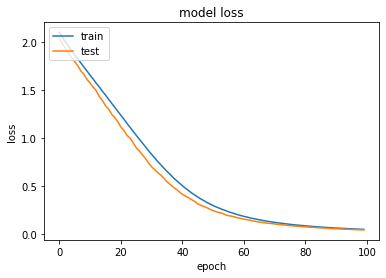

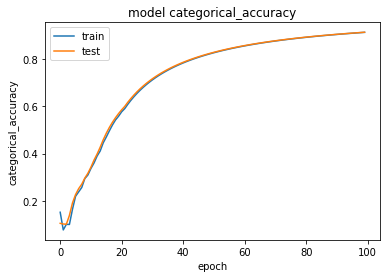

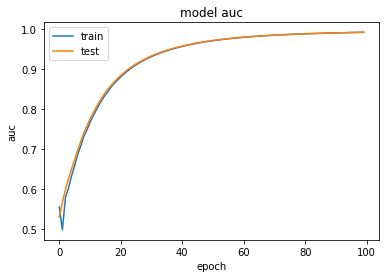

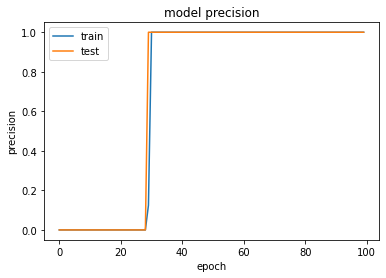

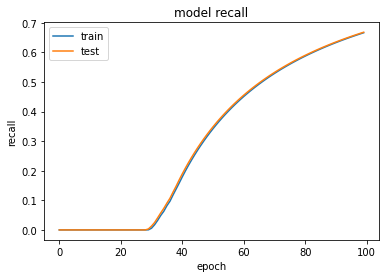

In [20]:
# Plot the metrics
#
for ix in range(int(len(keys) / 2)):
    plot_metric(history.history, keys[ix])

In [21]:
# Predict the values in the test set
#
y_predict0 = model.predict(X_test)
y_predict_idx = np.argmax(y_predict0, axis=1)
roomid_predict = to_categorical(y_predict_idx, number_of_classes).astype(int)
val_accuracy = accuracy_score(y_test, roomid_predict)
print(f'val_accuracy = {val_accuracy}')

val_accuracy = 1.0


In [22]:
# Let's print the features in the test set
#
print(X_test)

   USER_User1  USER_User2  USER_User3  USER_User4  USER_User5  USER_User6  \
0         1.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         1.0         0.0         0.0         0.0   

   TYPE_1  TYPE_2  TYPE_3  TYPE_4  TYPE_5  TYPE_6  TYPE_8      DIFF  
0     0.0     0.0     0.0     1.0     0.0     0.0     0.0  1.000000  
1     0.0     0.0     1.0     0.0     0.0     0.0     0.0  0.333333  


In [23]:
# Let's print the labels in the test set
#
print(y_test)

   CLASS_26  CLASS_36  CLASS_39  CLASS_48  CLASS_59  CLASS_64  CLASS_66  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       1.0       0.0       0.0       0.0       0.0       0.0   

   CLASS_95  
0       1.0  
1       0.0  


In [24]:
print(y_predict0)

[[2.4471022e-03 7.2109012e-04 1.9664490e-03 5.0618718e-03 2.0413455e-03
  6.7789555e-03 3.2794066e-02 9.4818920e-01]
 [2.4072800e-03 9.6467960e-01 8.9294882e-03 3.3979898e-03 5.5725938e-03
  2.9983439e-03 8.0303075e-03 3.9842934e-03]]


In [25]:
print(y_predict_idx)

[7 1]
